In [ ]:

import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import numpy as np
import tensorflow as tf

#installed necessary libraries and imported them

In [2]:

df = pd.read_csv(r"C:\Users\aman\Desktop\MY PROJECT\NSE-TATAGLOBAL.csv")
#Historical prices of TATA Ind.


In [3]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df = df[["Close"]].copy()

In [6]:
df.describe()

,Close
count,2035.00000
mean,149.45027
std,48.71204
min,80.95000
25%,120.05000
50%,141.25000
75%,156.90000
max,325.75000


In [7]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller #Import adfuller function through module

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.7381007612988206
p-value: 0.411596386851831


In [8]:
from pmdarima.arima.utils import ndiffs

In [9]:
ndiffs(df.Close, test="adf")

1

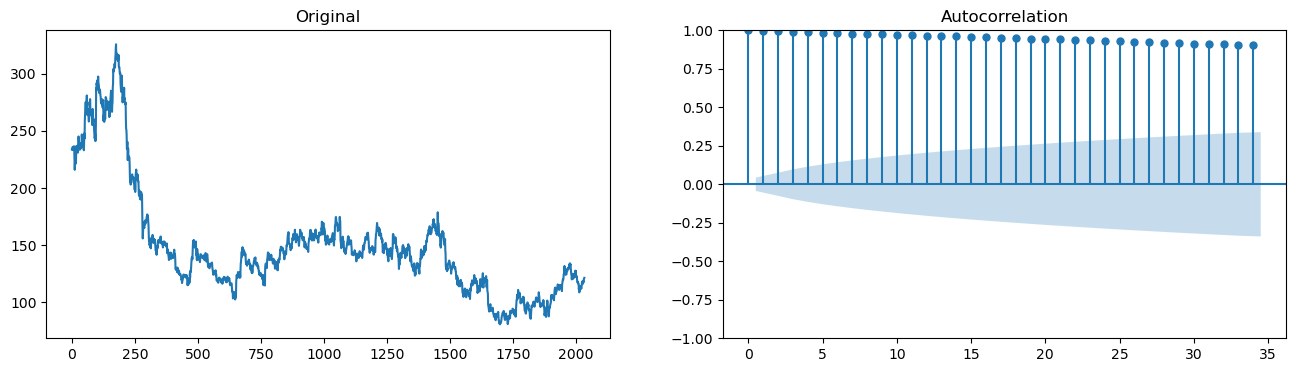

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)

ax1.set_title("Original")

# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);


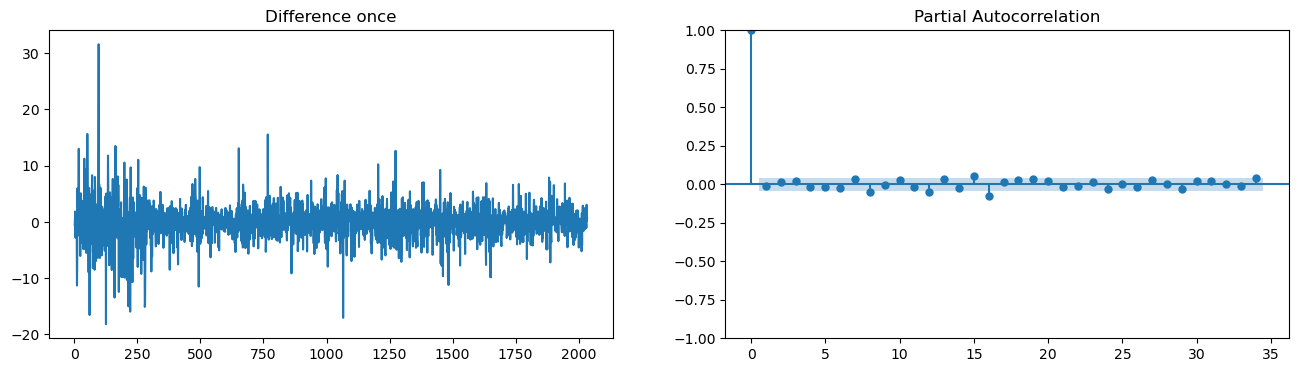

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_pacf (diff, ax=ax2);

In [13]:
from statsmodels.tsa.arima.model import ARIMA


#Fitting the ARIMA model with a different optimization method (e.g., 'nm')
model = ARIMA(df.Close, order=(5, 1, 5))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2035
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5261.167
Date:                Fri, 29 Mar 2024   AIC                          10544.334
Time:                        15:53:19   BIC                          10606.129
Sample:                             0   HQIC                         10567.004
                               - 2035                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9147      0.777      1.178      0.239      -0.607       2.437
ar.L2         -1.0235      0.882     -1.160      0.246      -2.752       0.705
ar.L3          1.1345      0.804      1.411      0.1

C:\Users\aman\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([3.92252916e-02, 5.47511547e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.95539838e-05]),
 array([-17.55454008,   7.57591392,  32.70636793,  57.83682194,
         82.96727595, 108.09772996, 133.22818397, 158.35863797,
        183.48909198, 208.61954599, 233.75      ]),
 <BarContainer object of 10 artists>)

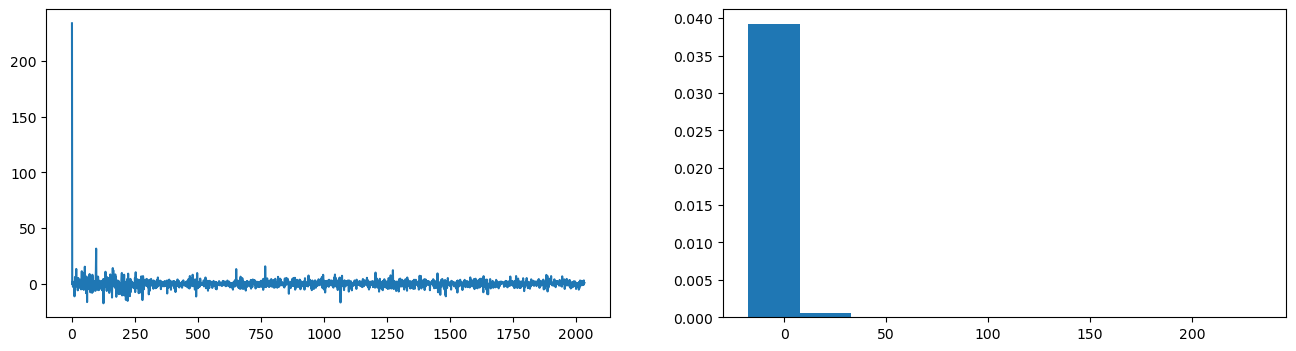

In [14]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (residuals) 
ax2.hist (residuals, density=True)

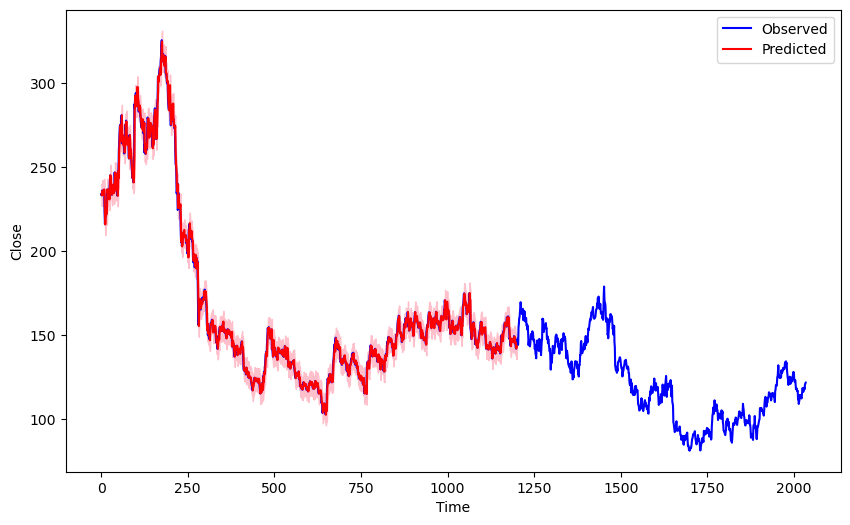

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Get predictions and confidence intervals
pred = result.get_prediction(start=1, end=1200, dynamic=False)
# Plotting the predictions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.Close.values, label='Observed', color='blue')
ax.plot(pred.predicted_mean, label='Predicted', color='red')
ax.fill_between(pred.conf_int().index, pred.conf_int()['lower Close'], pred.conf_int()['upper Close'], color='pink')
ax.set_xlabel('Time')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [16]:

#Train and test data split 
n = int(len(df) * 0.75)
train = df.Close[:n]
test = df.Close[n:]

print (len(train))
print (len(test))


1526
509


In [17]:
step = 30
forecast = result.forecast(steps=step)
conf_int = result.conf_int(alpha=0.05)  # 95% confidence level


fc = pd.Series(forecast, index=test[:step].index)
lower = pd.Series(conf_int.iloc[:, 0], index=test[:step].index)
upper = pd.Series(conf_int.iloc[:, 1], index=test[:step].index)

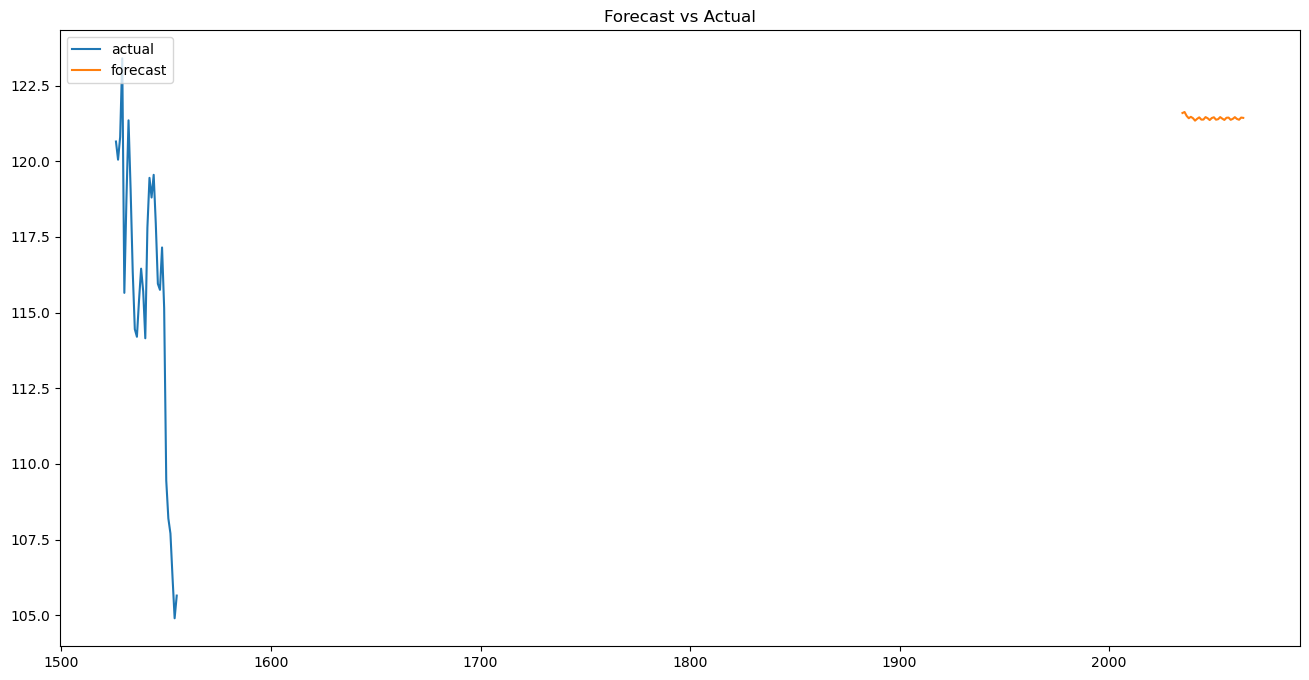

In [18]:
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="actual")

plt.plot(forecast, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.05)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
